# ¿Que más se podría hacer?

- Test con data augmentation y la LSTM
- Usar los tokenizadores usados en los transformers para ver como funcionan
- TSNE de embeddings y analizar si hay interpretación
- Probar con otras encimas o proteinas
- Usar los embeddings entrenados para analizar resultados de proteinas o encimas con menos data
- Entrenar una red neuronal con los features (fingerprints por ejemplo) y comparar los resultados con los embeddings


# Tome cualquiera de estas propuestas o alguna suya y desarrolle

## Armo un TSNE para entender si los embeddings entrenados por el modelo CNN tienen una interpretacion

In [15]:
from tensorflow.keras.models import load_model
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE

In [2]:
def R2(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

Importo el modelo

In [3]:
model_loaded = load_model('embed_128_text_cnn_aug_100x100_0.0001.h5', custom_objects={'R2': R2})

Saco los pesos de los embeddings

In [11]:
embeddings = model_loaded.layers[1].get_weights()[0]

Instancio un TSNE de dos dimensiones para graficar y lo entreno con los embeddings

In [16]:
tsne = TSNE(2, verbose=1)

In [17]:
embed_2d = tsne.fit_transform(embeddings)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 41 nearest neighbors...
[t-SNE] Indexed 42 samples in 0.000s...
[t-SNE] Computed neighbors for 42 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 42 / 42
[t-SNE] Mean sigma: 0.370306
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.144405
[t-SNE] KL divergence after 1000 iterations: 0.467354


Me traigo el diccionario de smiles y armo un reverse index del mismo

In [24]:
from datagen import smiles_dict

In [37]:
smiles_dict

{'#': 1,
 '(': 2,
 ')': 3,
 '+': 4,
 '-': 5,
 '.': 35,
 '/': 6,
 '1': 7,
 '10': 41,
 '11': 42,
 '2': 8,
 '3': 9,
 '4': 10,
 '5': 11,
 '6': 12,
 '7': 13,
 '8': 14,
 '9': 40,
 '=': 15,
 '@': 34,
 'B': 37,
 'Br': 30,
 'C': 16,
 'Cl': 29,
 'F': 17,
 'H': 18,
 'I': 19,
 'N': 20,
 'O': 21,
 'P': 22,
 'S': 23,
 '[': 24,
 '\\': 25,
 ']': 26,
 '_': 27,
 'a': 36,
 'c': 28,
 'e': 38,
 'i': 39,
 'n': 31,
 'o': 32,
 's': 33}

In [32]:
reverse_index = dict([(value, key) for (key, value) in smiles_dict.items()])

Grafico

In [18]:
from matplotlib import pyplot as plt

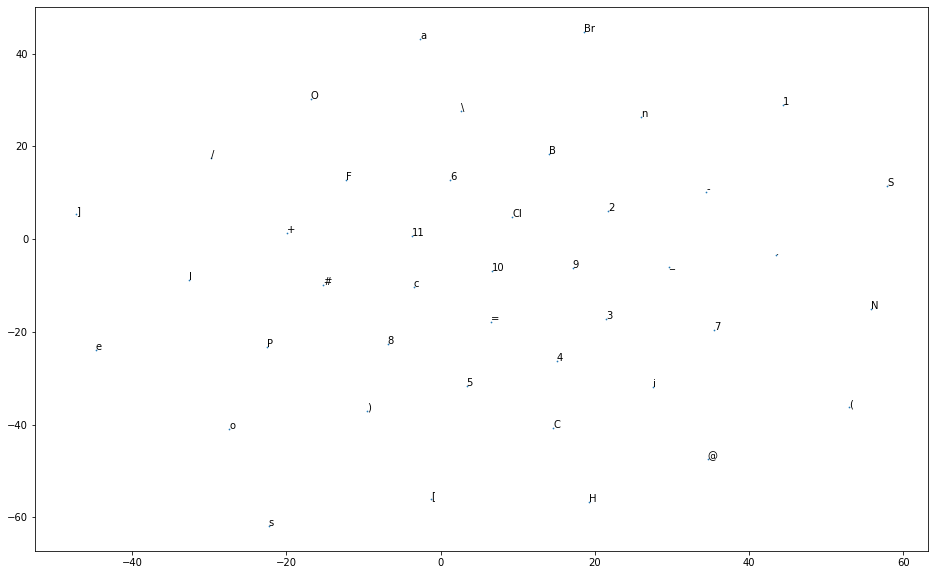

In [36]:
plt.figure(figsize=(16,10))
plt.scatter(embed_2d[:,0], embed_2d[:,1], s = 0.5)
for smile in smiles_dict.keys():
  plt.text(embed_2d[smiles_dict[smile]-1][0], embed_2d[smiles_dict[smile]-1][1],reverse_index[smiles_dict[smile]])
plt.show()

A pesar de tener un conocimiento extremadamente básico de química, puedo observar que, por ejemplo, la C y la H se encuentran muy próximas, algo esperable dado que los enlaces carbono e hidrógeno son muy comunes.

Por otro lado, los números tienden a encontrarse juntos (en la parte central del gráfico)